In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [32]:
f = pd.read_csv(r'C:\Users\Goldy\OneDrive\Desktop\datasets\CSUSHPISA.csv')

In [34]:
f.head()

,DATE,CSUSHPISA_CHG
0,1987-02-01,0.460
1,1987-03-01,0.311
2,1987-04-01,0.399
3,1987-05-01,0.434
4,1987-06-01,0.507


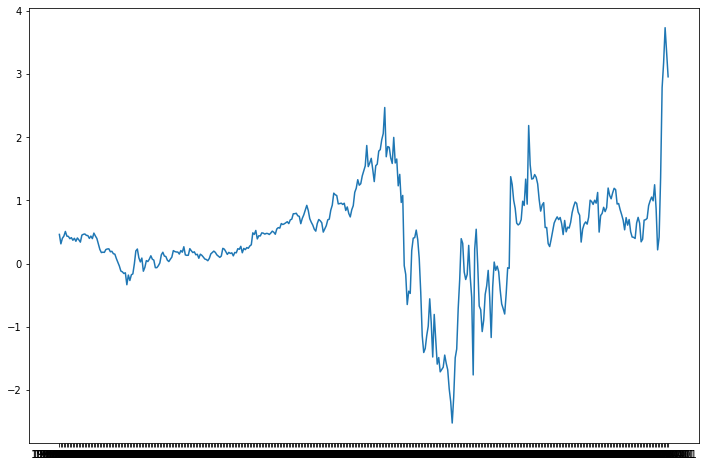

In [24]:
plt.figure(figsize=(12,8))

plt.plot(f)

In [35]:
f.corr


<bound method DataFrame.corr of            DATE  CSUSHPISA_CHG
0    1987-02-01          0.460
1    1987-03-01          0.311
2    1987-04-01          0.399
3    1987-05-01          0.434
4    1987-06-01          0.507
..          ...            ...
402  2020-08-01          2.782
403  2020-09-01          3.176
404  2020-10-01          3.731
405  2020-11-01          3.334
406  2020-12-01          2.954

[407 rows x 2 columns]>

In [36]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           407 non-null    object 
 1   CSUSHPISA_CHG  407 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.5+ KB


In [37]:
f['DATE'] = pd.to_datetime(f['DATE'])
f['DATE'] = f['DATE'].dt.strftime('%d.%m.%Y')


f['year'] = pd.DatetimeIndex(f['DATE']).year


f['dayofyear'] = pd.DatetimeIndex(f['DATE']).dayofyear
f['weekofyear'] = pd.DatetimeIndex(f['DATE']).weekofyear
f['weekday'] = pd.DatetimeIndex(f['DATE']).weekday
f['quarter'] = pd.DatetimeIndex(f['DATE']).quarter
f['is_quarter_start'] = pd.DatetimeIndex(f['DATE']).is_quarter_start
f['is_quarter_end'] = pd.DatetimeIndex(f['DATE']).is_quarter_end
f['is_month_start'] = pd.DatetimeIndex(f['DATE']).is_month_start
f['is_month_end'] = pd.DatetimeIndex(f['DATE']).is_month_end
f['is_year_start'] = pd.DatetimeIndex(f['DATE']).is_year_start
f['is_year_end'] = pd.DatetimeIndex(f['DATE']).is_year_end
f['is_leap_year'] = pd.DatetimeIndex(f['DATE']).is_leap_year

<ipython-input-37-897e5e740a04>:9: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  f['weekofyear'] = pd.DatetimeIndex(f['DATE']).weekofyear


In [38]:
f['year'] = f['year'].values/1000

f['weekofyear'] = f['weekofyear'].values/10

In [39]:
f = f.drop(['DATE'], axis = 1) 

In [40]:
f = pd.get_dummies(f, columns=['weekday'], drop_first=True, prefix='wday')
f = pd.get_dummies(f, columns=['quarter'], drop_first=True, prefix='qrtr')
f = pd.get_dummies(f, columns=['is_quarter_start'], drop_first=True, prefix='q_start')
f = pd.get_dummies(f, columns=['is_quarter_end'], drop_first=True, prefix='q_end')

f = pd.get_dummies(f, columns=['is_month_start'], drop_first=True, prefix='m_start')

f = pd.get_dummies(f, columns=['is_month_end'], drop_first=True, prefix='m_end')
f = pd.get_dummies(f, columns=['is_year_start'], drop_first=True, prefix='y_start')

f = pd.get_dummies(f, columns=['is_year_end'], drop_first=True, prefix='y_end')
f = pd.get_dummies(f, columns=['is_leap_year'], drop_first=True, prefix='lpyr')

In [41]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CSUSHPISA_CHG  407 non-null    float64
 1   year           407 non-null    float64
 2   dayofyear      407 non-null    int64  
 3   weekofyear     407 non-null    float64
 4   wday_1         407 non-null    uint8  
 5   wday_2         407 non-null    uint8  
 6   wday_3         407 non-null    uint8  
 7   wday_4         407 non-null    uint8  
 8   wday_5         407 non-null    uint8  
 9   wday_6         407 non-null    uint8  
 10  q_start_True   407 non-null    uint8  
 11  m_start_True   407 non-null    uint8  
 12  y_start_True   407 non-null    uint8  
 13  lpyr_True      407 non-null    uint8  
dtypes: float64(3), int64(1), uint8(10)
memory usage: 16.8 KB


In [42]:
f.columns

Index(['CSUSHPISA_CHG', 'year', 'dayofyear', 'weekofyear', 'wday_1', 'wday_2',
       'wday_3', 'wday_4', 'wday_5', 'wday_6', 'q_start_True', 'm_start_True',
       'y_start_True', 'lpyr_True'],
      dtype='object')

In [43]:
X = f.drop(['CSUSHPISA_CHG'],axis=1)
y=f['CSUSHPISA_CHG']

In [44]:
X

,year,dayofyear,weekofyear,wday_1,wday_2,wday_3,wday_4,wday_5,wday_6,q_start_True,m_start_True,y_start_True,lpyr_True
0,1.987,2,0.1,0,0,0,1,0,0,0,0,0,0
1,1.987,3,0.1,0,0,0,0,1,0,0,0,0,0
2,1.987,4,0.1,0,0,0,0,0,1,0,0,0,0
3,1.987,5,0.2,0,0,0,0,0,0,0,0,0,0
4,1.987,6,0.2,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,2.020,8,0.2,0,1,0,0,0,0,0,0,0,1
403,2.020,9,0.2,0,0,1,0,0,0,0,0,0,1
404,2.020,10,0.2,0,0,0,1,0,0,0,0,0,1
405,2.020,11,0.2,0,0,0,0,1,0,0,0,0,1


In [45]:
y

0      0.460
1      0.311
2      0.399
3      0.434
4      0.507
       ...  
402    2.782
403    3.176
404    3.731
405    3.334
406    2.954
Name: CSUSHPISA_CHG, Length: 407, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf = RandomForestRegressor()

In [50]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [51]:
prd = rf.predict(X_test)

In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_score(y_test,prd)

0.8338734731811479